# Machine learning ISUP: k-nearest neighbors

stolen from Maxime Sangnier

# Jafuno Douba


In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import cm

def plotXY(X, Y):
    if Y.ndim > 1:
        X1 = X
        X2 = Y
        XX = np.concatenate((X, Y), axis=0)
        YY = np.concatenate((np.ones(X.shape[0]), -np.ones(Y.shape[0])))
    else:
        XX = X
        YY = Y
    for cl in np.unique(Y):
        plt.scatter(XX[YY==cl, 0], XX[YY==cl, 1])
    
def map_regions(clf, data=None, num=200):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

### k-nearest neighbors

Given a training dataset $\{(X_1, Y_1), \dots, (X_n, Y_n)\}$, the k-nearest neighbors rule consists in predicting, for $x \in \mathbb R^d$, the majority vote (for classification, or the mean for regression) of the k-nearest neighbors of $x$.
Formally, the predicted class is:
$$
    g(x) \in \operatorname{arg\,max}_{y \in \mathcal Y} \sum_{j=1}^k \mathbb 1_{Y_{(i)}=y},
$$
where the ranked labeled $\{Y_{(1)}, \dots, Y_{(n)}\}$ are such that $\|X_{(1)}-x\| \le \dots \le \|X_{(n)}-x\|$.

Given the following dataset, train a [k-nearest neighbors classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and display the data along with the classification regions.

What is the default metric?

In [3]:
# Generating a dataset

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=4,
                           n_features=2, n_redundant=0, n_clusters_per_class=1)


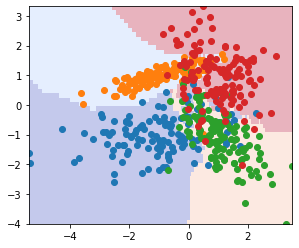

In [4]:
# Put your code here
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier() 
clf.fit(X,y)
plotXY(X,y)
map_regions(clf,X)


Repeat this experiment while making the number of neareset neighbors vary.
Display the results on several subplots with the classification score indicated in the title.

What appens in the extreme situations where the number of nearest neighbors is either $1$ or $n$ (the size of the training set)?

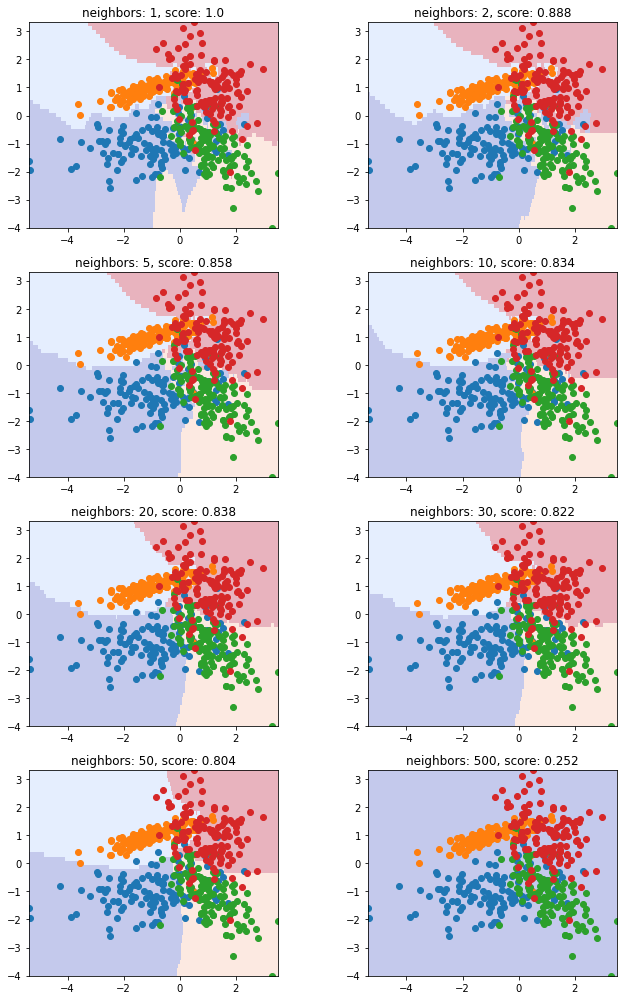

In [5]:
# Answer
plt.figure(figsize=(10, 14))
for it, k in enumerate([1, 2, 5, 10, 20, 30, 50, X.shape[0]]):  #it de 0 à 7
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    #graph a la suite pyplot.subplot(2,1,1) : partage la figure en 2 x 1 emplacements de graphes 
    #(2 lignes et 1 colonne) et sélectionne le 1er emplacement pour les instructions graphiques suivantes. 
    #Les numéros des graphes sont comptés par ligne.
    plt.subplot(4, 2, it+1)
    plotXY(X, y)
    map_regions(clf, X)
    plt.title("neighbors: {}, score: {}".format(k, clf.score(X, y)))
plt.tight_layout()  # car on a mis plt.figure 


For a point $x \in \mathbb R^d$, the predicted class is given by the majority vote
$$
    g(x) \in \operatorname{arg\,max}_{y \in \mathcal Y} \sum_{j=1}^k \mathbb 1_{Y_{(i)}=y},
$$
where the ranked labeled $\{Y_{(1)}, \dots, Y_{(n)}\}$ are such that $\|X_{(1)}-x\| \le \dots \le \|X_{(n)}-x\|$.

We would like, for a while, to weight the vote of each neighbor in the prediction by $e^{-\gamma \|X_{(j)}-x\|^2}$, such that the new classification rule is
$$
    g_\gamma(x) \in \operatorname{arg\,max}_{y \in \mathcal Y} \sum_{j=1}^k e^{-\gamma \|X_{(j)}-x\|^2} \mathbb 1_{Y_{(i)}=y}.
$$

Again with subplots and score prints, assess the impact of the parameter $\gamma$.
For this purpose, you may want to define the *weights* parameter of the [k-nearest neighbors classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to $x \mapsto e^{-\gamma x^2}$, using a lambda function.

Relevant values for $\gamma$ are $\{10^{-3}, \dots, 10^4\}$ and *n\_neighbors* can be set to $10$.

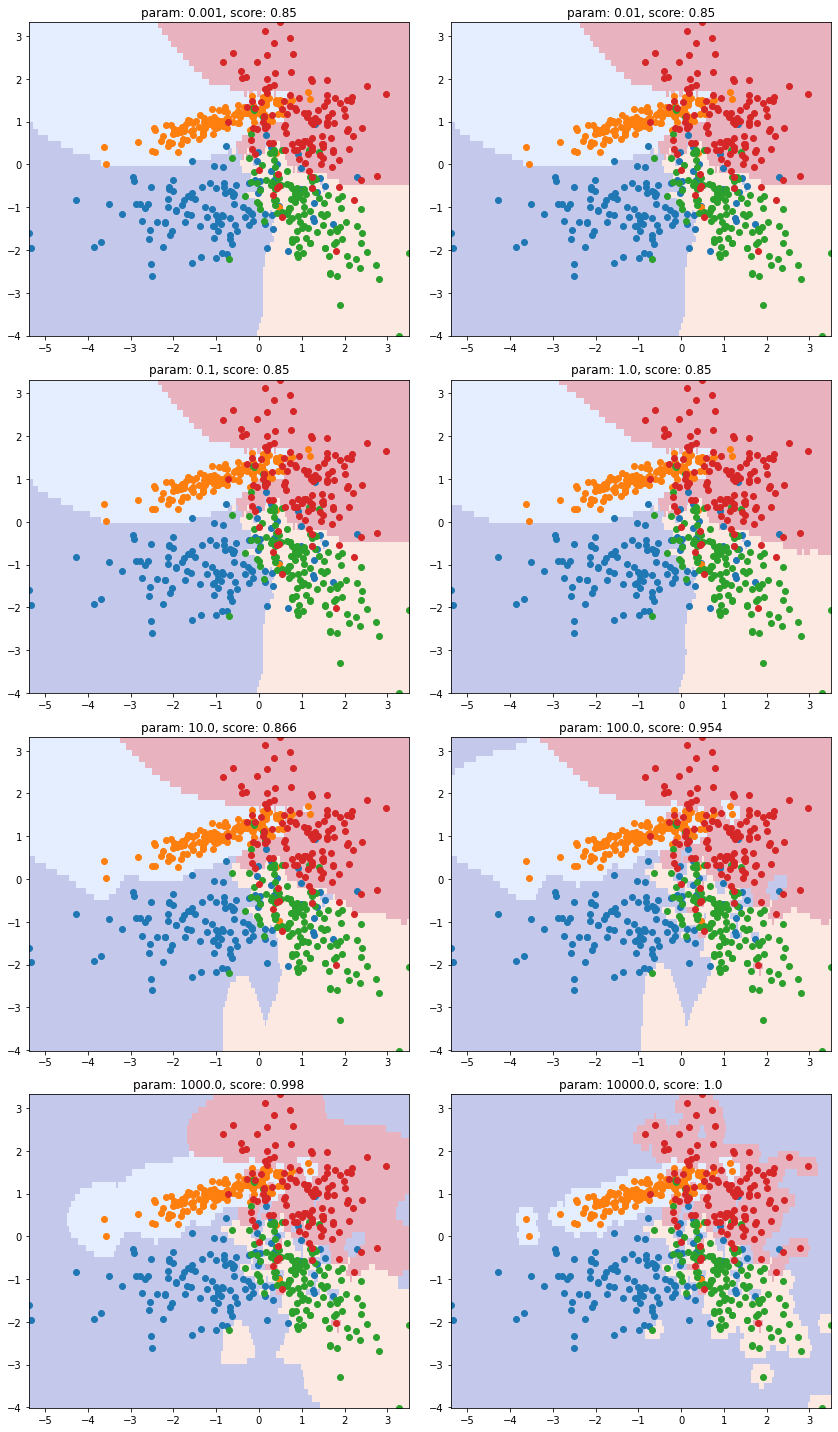

In [6]:
# Answer
n_neighbors = 10

plt.figure(figsize=(12, 20))
for it, param in enumerate(np.logspace(-3, 4, num=8)): 
    # Put your code here
#numpy.logspace(1, 4, 5): 5 éléments régulièrement espacés selon une progression géométrique entre 10^1 et 10^4 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=lambda t: np.exp(- param * t**2))
    clf.fit(X, y)
    
    plt.subplot(4, 2, it+1)
    plotXY(X, y)
    map_regions(clf, X)
    plt.title("param: {}, score: {}".format(param, clf.score(X, y)))
plt.tight_layout()  # car on a mis plt.figure 

Using the [train\_test\_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, split the dataset into a training and a test set with ratio $0.6-0.4$.
Plot the test accuracy with respect to the number of neighbors.

This curve estimates the generalization ability of the classifier currently studied.
What can you say about the variance of this estimator?

Text(0.5, 1.0, 'Test accuracy')

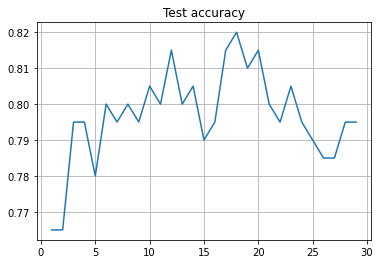

In [7]:
# Put your code here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) #donc donnée d'entrainement 60%

k_values = np.arange(1, 30)
score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
plt.plot(k_values, score) #12 a un meilleur score 
plt.grid()
plt.title("Test accuracy")


Using the [crossval\_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function, find (and print) a good value for the number of nearest neighbors.

For this parameter, compare the crossvalidation score and the test accuracy.

In [8]:
# Answer
from sklearn.model_selection import cross_val_score

score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    score.append(cross_val_score(clf, X_train, y_train).mean()) #score d'enreainement 
    
ik = np.argmax(score)
n_neighbors = k_values[ik]
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

print("Neighbors:", n_neighbors)
print("Crossval score:", score[ik])
print("Test accuracy:", clf.score(X_test, y_test));



Neighbors: 17
Crossval score: 0.8266666666666665
Test accuracy: 0.815


Plot the confusion matrix for this classifier.

In [9]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y, classes=None, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Confusion matrix'
    cmap=plt.cm.Blues
    
    cm = confusion_matrix(y, y_pred)
    
    if classes is None:
        classes = np.unique(y)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Unnormalized confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

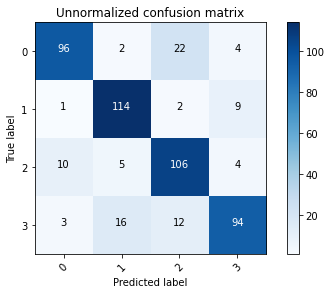

In [10]:
# Put your code here
y_pred = clf.predict(X)  #c'est x qui prédit y
plot_confusion_matrix(y_pred, y)